<a href="https://colab.research.google.com/github/MoosaSaadat/handsonml/blob/master/handwritten_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load dataset
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
# Analyse sets
print(f"Training set: {x_train.shape}")
print(f"Testing set:  {x_test.shape}")

Training set: (60000, 28, 28)
Testing set:  (10000, 28, 28)


In [4]:
# Scale features
x_train, x_test = x_train / 255, x_test / 255

This is number '3'


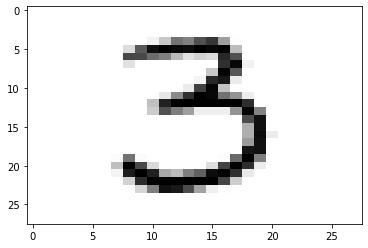

In [8]:
# Visualize data
idx = 50
print(f"This is number '{y_train[idx]}'")
plt.imshow(x_train[idx], aspect="auto", cmap="binary")

In [9]:
# Create model
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(600, activation="relu"),
    keras.layers.Dense(200, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 600)               471000    
_________________________________________________________________
dense_1 (Dense)              (None, 200)               120200    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2010      
Total params: 593,210
Trainable params: 593,210
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Compile model
model.compile(optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [11]:
# Train model
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1858 - accuracy: 0.9444
Epoch 2/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0801 - accuracy: 0.9757
Epoch 3/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0542 - accuracy: 0.9829
Epoch 4/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0409 - accuracy: 0.9870
Epoch 5/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0328 - accuracy: 0.9892
Epoch 6/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0278 - accuracy: 0.9911
Epoch 7/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0219 - accuracy: 0.9929
Epoch 8/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0200 - accuracy: 0.9932
Epoch 9/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0185 - accuracy: 0.9937
Epoch 10/10
1875/1875 [==============================] - 13s 7ms/step - l

In [12]:
# Evaluate model
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Accuracy: {accuracy*100}")
print(f"Loss: {loss*100}")

Accuracy: 98.18999767303467
Loss: 9.301449358463287


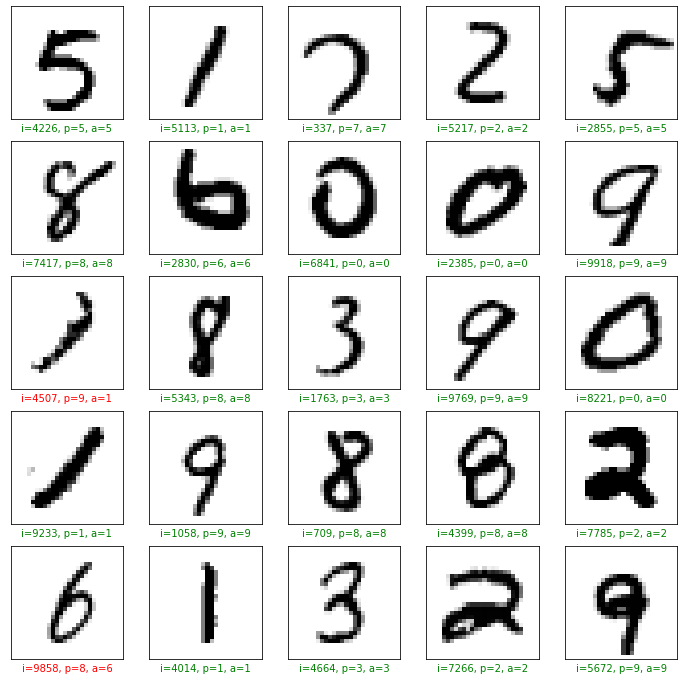

In [18]:
# Predicting test dataset
indices = np.random.randint(x_test.shape[0], size=25)
plt.figure(figsize=(12,12))

predictions = model.predict(x_test)
for idx, i in enumerate(indices):
  plt.subplot(5, 5, idx+1)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  prediction = np.argmax(predictions[i])
  actualVal = y_test[i]

  col = "g" if prediction == actualVal else "r"
  plt.xlabel(f"i={i}, p={prediction}, a={actualVal}", color=col)
  plt.imshow(x_test[i], cmap="binary")